In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import os
from matplotlib import cm
import scipy.interpolate
import scipy.signal
import pickle
import importlib
import patch_clamp

root = '/Volumes/Science/Biology/Patch clamp data/SCIENCE-MJ0GJEF/C/Users/alan/Documents/Data'
store_path = '/Users/alanmardinly/Documents/GitHub/scripts/biology/patch_clamping/chrmine_shortpulses.dat'
pc = patch_clamp.generate_power_curve()

In [59]:
df = pickle.load(open(store_path,'rb'))


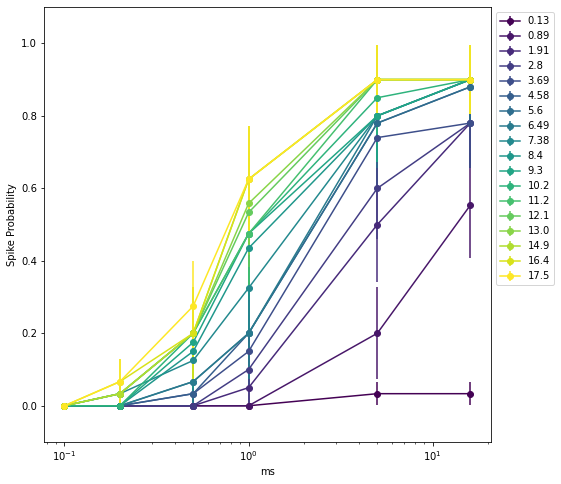

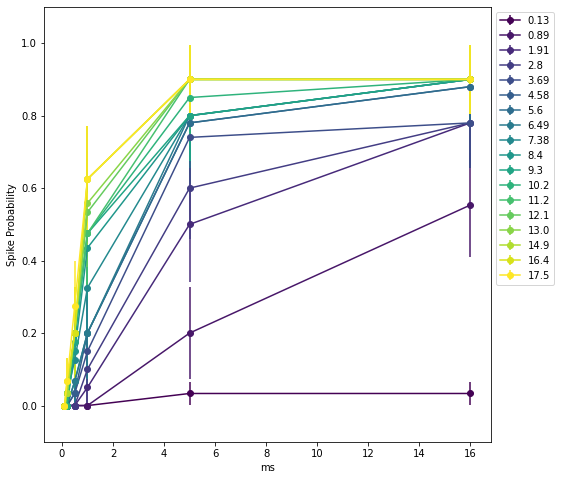

In [60]:
viridis =cm.get_cmap('viridis', len(df['vc'].iloc[0].keys()))
PC = patch_clamp.generate_power_curve();
x_data = []
power_curve_sp = []
global_sp5ms=[]

for iii, key in enumerate(df['sp'].iloc[0].keys()):           
    n = 0
    depo=[]

    for i, row in df.iterrows():
        if row['sp'] is not None:
            depo_flag = False
            if key in row['sp'].keys():
                n += 1
                revised_row = []
                for ele in row['sp'][key][1]:
                    if ele >= 1:
                        depo_flag = True
                    if depo_flag == True:
                        ele = 1
                    revised_row.append(ele)
                depo.append(revised_row)
        
        
  
#    plt.errorbar(row['sp'][key][0], np.mean(np.array(depo),0), np.std(np.array(depo),0),marker='o')

    power = PC(float(key))
    power = np.round(power,2)
        
    mean_vals =  np.mean(np.array(depo),0)
    plt.figure(1, figsize=(8,8))
    plt.errorbar(np.array(row['sp'][key][0]), mean_vals, np.std(np.array(depo) / np.sqrt(10),0), marker='o', color=viridis(iii), label=str(power))
    plt.xscale('log')
    plt.xlabel('ms')
    plt.ylabel('Spike Probability')
    plt.legend()
    plt.ylim(-.1,1.1)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
              ncol=1, fancybox=True, shadow=False)
    plt.figure(2, figsize=(8,8))
    plt.errorbar(np.array(row['sp'][key][0]), mean_vals, np.std(np.array(depo),0)  / np.sqrt(10), marker='o', color=viridis(iii), label=str(power))
    #plt.xscale('log')
    plt.xlabel('ms')
    plt.ylim(-.1,1.1)
    plt.ylabel('Spike Probability')
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
              ncol=1, fancybox=True, shadow=False)
    
    power_curve_sp.append(mean_vals)
    x_data.append(power)
    
    global_sp5ms.append(np.mean(np.array(depo)[:,5]))


In [61]:
min_power_for_reliable_spikes_idx = np.min(np.where(np.array(global_sp5ms) >= .9)[0])
print(min_power_for_reliable_spikes_idx)

7


mean -952.2059999999999, std 576.110024287028


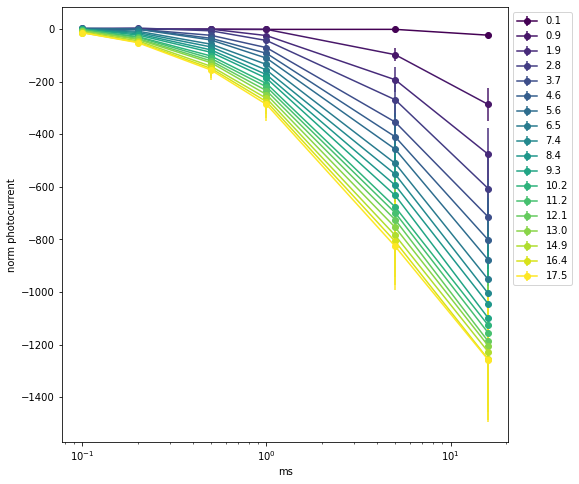

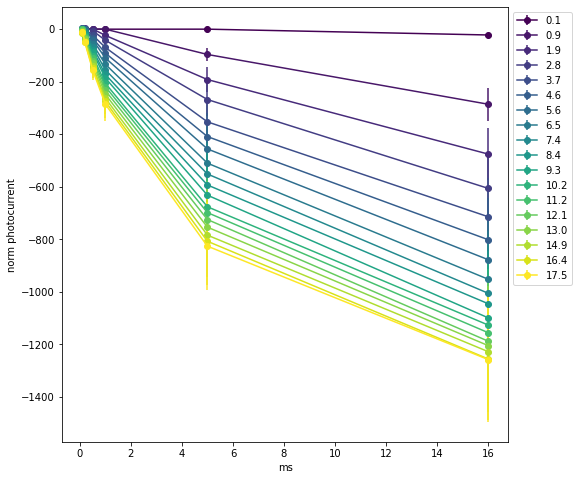

In [62]:
viridis =cm.get_cmap('viridis', len(df['vc'].iloc[0].keys()))
power_curve_vc=[]
max_currents=[]
for iii, key in enumerate(list(df['vc'].iloc[0].keys())):           
    photocurrents=[]

    n = 0
    for i, row in df.iterrows():
        if row['vc'] is not None:
            if key in row['vc'].keys():
                photocurrents.append(row['vc'][key][1])
                n += 1
                
        
    max_currents.append(np.min(photocurrents))
            
    plt.figure(1, figsize=(8,8))
    plt.errorbar(row['vc'][key][0], np.mean(np.array(photocurrents),0), np.std(np.array(photocurrents),0) / np.sqrt(n), marker='o', color=viridis(iii), label=str(key))
    plt.xlabel('ms')
    plt.ylabel('norm photocurrent')
    #plt.ylim(-.1,1.1)
    plt.legend()
    plt.xscale('log')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
              ncol=1, fancybox=True, shadow=False)
    
    plt.figure(2, figsize=(8,8))
    plt.errorbar(row['vc'][key][0], np.mean(np.array(photocurrents),0), np.std(np.array(photocurrents),0)  / np.sqrt(n), marker='o', color=viridis(iii), label=str(key))
    plt.xlabel('ms')
    plt.ylabel('norm photocurrent')
    #plt.ylim(-.1,1.1)
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
              ncol=1, fancybox=True, shadow=False)
    
    power_curve_vc.append(np.mean(np.array(photocurrents),0))
    if iii==min_power_for_reliable_spikes_idx:
        photocurrents=np.array(photocurrents)
        print(f'mean {np.mean(photocurrents[:,5])}, std {np.std(photocurrents[:,5])}')

In [63]:
  print(f'mean {np.mean(max_currents)} std {np.std(max_currents)}, n = {n}')

mean -1679.4450000000002 std 579.65059569681, n = 10


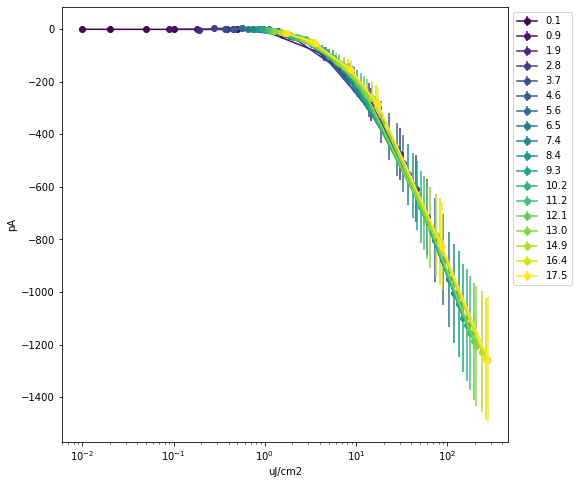

In [64]:
viridis =cm.get_cmap('viridis', len(df['vc'].iloc[0].keys()))
power_curve_uj = []
x_data = []
for iii, key in enumerate(df['vc'].iloc[0].keys()):           

    depo=[]

    for i, row in df.iterrows():
        if row['vc'] is not None:
            if key in row['vc'].keys():
                #plt.subplot(5,5,iii+1)
                #plt.plot(np.array(row['vc'][key][0]) * float(key),row['vc'][key][1],'-',alpha=.21,color='tab:blue')
                #plt.xlabel('mJ/cm2')
                #plt.ylabel('pA')
                #plt.ylim(-2000,100)
                #plt.title(f'{str(key)} mW/cm2')
                depo.append(row['vc'][key][1])
        
    mean_vals = np.mean(np.array(depo),0)    
    plt.figure(1, figsize=(8,8))
    plt.errorbar(np.array(row['vc'][key][0]) * float(key), np.mean(np.array(depo),0), np.std(np.array(depo), 0) / np.sqrt(10), marker='o', color=viridis(iii), label=str(key))
    plt.xscale('log')
    plt.xlabel('uJ/cm2')
    plt.ylabel('pA')
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
              ncol=1, fancybox=True, shadow=False)

    power_curve_uj.append(mean_vals)
    x_data.append(float(key))
#plt.savefig('energy.svg',dpi=600,format='svg')

In [65]:
from scipy import interpolate
power = list(df.iloc[1]['cc'].keys())
power = [(float(x)) for x in power]
time = [0.1, 0.2, 0.5, 1, 5, 16]

spi = interpolate.interp2d(time,power,power_curve_sp)
vci = interpolate.interp2d(time,power,power_curve_vc)

In [66]:
power

[0.1,
 0.9,
 1.9,
 2.8,
 3.7,
 4.6,
 5.6,
 6.5,
 7.4,
 8.4,
 9.3,
 10.2,
 11.2,
 12.1,
 13.0,
 14.9,
 16.4,
 17.5]

In [67]:
print(f'power for reliable spikes at 5 ms {power[int(min_power_for_reliable_spikes_idx)]}')

power for reliable spikes at 5 ms 6.5


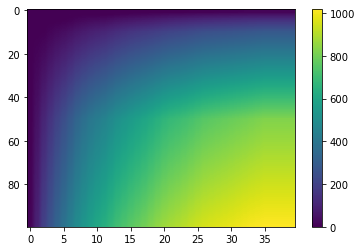

In [71]:
vci = pickle.load(open('vc_interp.dat','rb'))
smo = np.empty((int(10000/100),40))
for i, d in enumerate(range(0,10000,100)):
    duration = d / 1000
    for p in range(0,40):
        power = p / 2
        smo[i,p]=np.abs(vci(duration, power))
plt.imshow(smo, aspect='auto')
#plt.axis('equal')
#plt.yticks(range(0,18),(power), fontsize=14)
#plt.ylabel('mW/cm2')
#plt.xticks(range(0,6),[0.1, 0.2, 0.5, 1, 5, 16], fontsize=14)
#plt.xlabel('ms')
plt.colorbar()
#plt.savefig('voltage_clamp_interp.svg',dpi=600,format='svg')
pickle.dump(vci, open('vc_interp.dat','wb'))


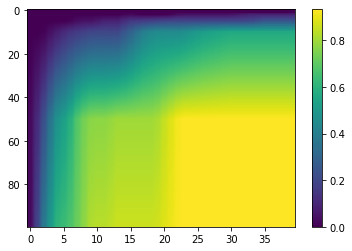

In [72]:
spi = pickle.load(open('spike_prob_interp.dat','rb'))
smo = np.empty((int(10000/100),40))
for i, d in enumerate(range(0,10000,100)):
    duration = d / 1000
    for p in range(0,40):
        power = p / 2
        smo[i,p]=spi(duration, power)
plt.imshow(smo, aspect='auto')
#plt.axis('equal')
#plt.yticks(range(0,18),(power), fontsize=14)
#plt.ylabel('mW/cm2')
#plt.xticks(range(0,6),[0.1, 0.2, 0.5, 1, 5, 16], fontsize=14)
#plt.xlabel('ms')
#plt.savefig('current_clamp_interp.svg',dpi=600,format='svg')
plt.colorbar()
pickle.dump(spi, open('spike_prob_interp.dat','wb'))
